In [1]:
import numpy as np
import matplotlib.pyplot as plt
from plot_utils import set_size
from matplotlib.cm import get_cmap

/tmp/ipykernel_16719/318480625.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap('CMRmap')
/tmp/ipykernel_16719/318480625.py:63: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim([0,None])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


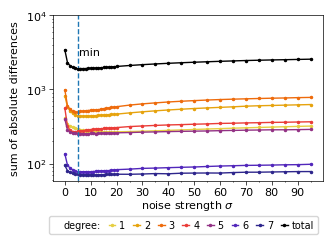

5


In [2]:
plt.rcParams['font.size'] = 8                 
plt.rcParams['lines.linewidth'] = 1           
plt.rcParams['lines.markersize'] = 3
plt.rcParams['figure.figsize'] = set_size(252,subplots=(1,1))
plt.rcParams['xtick.major.size'] = 3
plt.rcParams['xtick.major.width'] = 0.5
plt.rcParams['xtick.minor.size'] = 1.
plt.rcParams['xtick.minor.width'] = 0.5
plt.rcParams['ytick.major.size'] = 3
plt.rcParams['ytick.major.width'] = 0.5
plt.rcParams['ytick.minor.size'] = 1.
plt.rcParams['ytick.minor.width'] = 0.5
plt.rcParams['xtick.major.pad']=1.5
plt.rcParams['ytick.major.pad']=1.5
plt.rcParams['legend.fontsize'] = 7
plt.rcParams['legend.handlelength'] = plt.rcParams['legend.handleheight']
plt.rcParams['legend.columnspacing'] = 0.8
plt.rcParams['legend.handletextpad'] = 0.4

plt.rcParams['axes.linewidth'] = 0.5

fmt = 'eps'

sigmas = np.zeros((36),dtype=int)
sigmas[:20] = np.arange(0,20,dtype=int)
sigmas[20:] = np.arange(20,100,5,dtype=int)
max_deg = 7
shift = 1
test_length = '5e4'
safety_factor = 2

differences = np.genfromtxt('../data/analog/exp_sim_differences_shift'+str(shift)+'_safety'+str(safety_factor)+'.dat')

cmap = get_cmap('CMRmap')
data_color = np.concatenate([np.linspace(0.8,0.15,max_deg),[0]])
color_list = cmap(data_color)

total = differences.sum(axis=1)
min_idx = np.argmin(total)
min_diff_sigma = sigmas[min_idx]


if fmt == 'pdf':
    raster = True
    dpi = 300
elif fmt == 'eps':
    raster = False
    dpi = None
    

fig = plt.figure()
ax = fig.gca()

for i,diff in zip(range(max_deg), differences.T):
    ax.plot(sigmas,diff,marker='o',label=str(i+1),color=color_list[i],rasterized=raster,markersize=1.5)

ax.annotate('min',(min_diff_sigma,total[min_idx]),xytext=((min_diff_sigma+0.5,total[min_idx]+1000)))
ax.axvline(5,ls='--')
ax.semilogy()

ax.plot(sigmas,differences.sum(axis=1),marker='o',label='total',rasterized=raster,markersize=1.5,color='black')

ax.set_ylim([0,None])
ax.set_xlabel('noise strength ' + r'$\sigma$',labelpad=0.7)
ax.set_ylabel('sum of absolute differences')
ax.set_xticks(np.arange(0,100,5),minor=True)
ax.set_xticks(np.arange(0,100,10))
ax.set_xticklabels(np.arange(0,100,10,dtype=int))
ax.set_yticks([100,1000,10000])

# legend
ph = [plt.plot([],marker="", ls="")[0]]
handles, labels = ax.get_legend_handles_labels()
handles = ph + handles
labels = ['degree:'] + labels
leg = fig.legend(ncol=max_deg+2,loc='upper center',bbox_to_anchor=(0.5,-0.03),handles=handles,labels=labels,labelspacing=0.6)


    

plt.savefig(fmt+'/fig13_exp_sim_differences.'+fmt,dpi=dpi,bbox_inches='tight')
plt.show()
#print(min_diff_sigma)
